In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# Read the dataset

In [153]:
data=pd.read_csv('student-data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


# preprocessing steps

In [154]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [156]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [157]:
data['edu']=data['Medu']+data['Fedu']
data.drop(['Fedu','Medu'],axis=1,inplace=True)


In [158]:
data['job']=data['Mjob']+data['Fjob']
data.drop(['Mjob','Fjob'],axis=1,inplace=True)
data

,school,sex,age,address,famsize,Pstatus,reason,guardian,traveltime,studytime,...,famrel,freetime,goout,Dalc,Walc,health,absences,passed,edu,job
0,GP,F,18,U,GT3,A,course,mother,2,2,...,4,3,4,1,1,3,6,no,8,at_hometeacher
1,GP,F,17,U,GT3,T,course,father,1,2,...,5,3,3,1,1,3,4,no,2,at_homeother
2,GP,F,15,U,LE3,T,other,mother,1,2,...,4,3,2,2,3,3,10,yes,2,at_homeother
3,GP,F,15,U,GT3,T,home,mother,1,3,...,3,2,2,1,1,5,2,yes,6,healthservices
4,GP,F,16,U,GT3,T,home,father,1,2,...,4,3,2,1,2,5,4,yes,6,otherother
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,course,other,1,2,...,5,5,4,4,5,4,11,no,4,servicesservices
391,MS,M,17,U,LE3,T,course,mother,2,1,...,2,4,5,3,4,2,3,yes,4,servicesservices
392,MS,M,21,R,GT3,T,course,other,1,1,...,5,5,3,3,3,3,3,no,2,otherother
393,MS,M,18,R,LE3,T,course,mother,3,1,...,4,4,1,3,4,5,0,yes,5,servicesother


# data encoding

In [159]:
from sklearn.preprocessing import LabelEncoder
laben =LabelEncoder()
a=['job', 'reason', 'guardian']
for i in np.arange(len(a)):
    data[a[i]]=laben.fit_transform(data[a[i]])

In [160]:
data['passed'] = data['passed'].map({'yes': 1, 'no': 0})
data['schoolsup'] = data['schoolsup'].map({'yes': 1, 'no': 0})
data['famsup'] = data['famsup'].map({'yes': 1, 'no': 0})
data['paid'] = data['paid'].map({'yes': 1, 'no': 0})

In [161]:
data['activities'] = data['activities'].map({'yes': 1, 'no': 0})
data['nursery'] = data['nursery'].map({'yes': 1, 'no': 0})
data['higher'] = data['higher'].map({'yes': 1, 'no': 0})
data['internet'] = data['internet'].map({'yes': 1, 'no': 0})
data['romantic'] = data['romantic'].map({'yes': 1, 'no': 0})

In [163]:
data=pd.get_dummies(data)

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          395 non-null    int64
 1   reason       395 non-null    int32
 2   guardian     395 non-null    int32
 3   traveltime   395 non-null    int64
 4   studytime    395 non-null    int64
 5   failures     395 non-null    int64
 6   schoolsup    395 non-null    int64
 7   famsup       395 non-null    int64
 8   paid         395 non-null    int64
 9   activities   395 non-null    int64
 10  nursery      395 non-null    int64
 11  higher       395 non-null    int64
 12  internet     395 non-null    int64
 13  romantic     395 non-null    int64
 14  famrel       395 non-null    int64
 15  freetime     395 non-null    int64
 16  goout        395 non-null    int64
 17  Dalc         395 non-null    int64
 18  Walc         395 non-null    int64
 19  health       395 non-null    int64
 20  absences  

# splitting the dataset

In [165]:
y=data['passed']
x=data.drop(['passed'],axis=1)

In [166]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 34,test_size =0.2 )

In [167]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Building the Models -  LogisticRegression


In [182]:
from sklearn.preprocessing  import StandardScaler
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [183]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions= logmodel.predict(x_test)

In [184]:
print('Accuracy is: ',accuracy_score(y_test,predictions))
print('Precision is: ',precision_score(y_test,predictions))
print('Recall is: ',recall_score(y_test,predictions))
print('fl score is: ',f1_score(y_test,predictions))

Accuracy is:  0.620253164556962
Precision is:  0.6949152542372882
Recall is:  0.7735849056603774
fl score is:  0.7321428571428573


In [185]:
confusion_matrix(y_test,predictions)

array([[ 8, 18],
       [12, 41]], dtype=int64)

#  KNN

In [186]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors=np.arange(3,15)
for K in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=K,metric='minkowski')
    classifier.fit(x_train,y_train)
    predictions= classifier.predict(x_test)
    acc=accuracy_score(y_test,predictions)
    acc_values.append(acc)

In [187]:
acc_values

[0.6835443037974683,
 0.6075949367088608,
 0.6455696202531646,
 0.620253164556962,
 0.6708860759493671,
 0.6582278481012658,
 0.6455696202531646,
 0.6708860759493671,
 0.6835443037974683,
 0.6835443037974683,
 0.7088607594936709,
 0.7215189873417721]

Text(0, 0.5, 'accuracy')

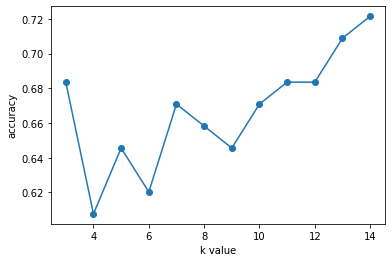

In [188]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [189]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski')
classifier.fit(x_train,y_train)
predictions= classifier.predict(x_test)

In [190]:
print('Accuracy is: ',accuracy_score(y_test,predictions))
print('Precision is: ',precision_score(y_test,predictions))
print('Recall is: ',recall_score(y_test,predictions))
print('fl score is: ',f1_score(y_test,predictions))

Accuracy is:  0.7088607594936709
Precision is:  0.7205882352941176
Recall is:  0.9245283018867925
fl score is:  0.8099173553719008


In [191]:
confusion_matrix(y_test,predictions)

array([[ 7, 19],
       [ 4, 49]], dtype=int64)

#  decision tree

In [198]:
from sklearn.tree  import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)
predictions= dtmodel.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))
print('fl score is: ',f1_score(y_test,predictions))

Accuracy is:  0.5443037974683544
fl score is:  0.64


In [193]:
confusion_matrix(y_test,predictions)

array([[11, 15],
       [19, 34]], dtype=int64)

# SVM

In [199]:
from sklearn.svm import SVC
svmlinear = SVC(kernel='linear')
svmlinear.fit(x_train,y_train)
predictions= svmlinear.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.6708860759493671


In [200]:
svmpoly = SVC(kernel='poly',degree =3)
svmpoly.fit(x_train,y_train)
predictions= svmpoly.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.7215189873417721


In [201]:
svmradial = SVC(kernel='rbf')
svmradial.fit(x_train,y_train)
predictions= svmradial.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.7215189873417721


# RandomForest

In [194]:
from sklearn.ensemble  import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictions= rf.predict(x_test)

In [195]:
confusion_matrix(y_test,predictions)

array([[13, 13],
       [ 5, 48]], dtype=int64)

In [197]:
print('Accuracy is: ',accuracy_score(y_test,predictions))
print('fl score is: ',f1_score(y_test,predictions))

Accuracy is:  0.7721518987341772
fl score is:  0.8421052631578947


From these model F score and accuracy is maximum nearly to 1 is for Random forest model.
So we can conclude that from these models Random model can give the best results.